<font color='blue'> First of all, please “Copy to Drive” to get your own copy for editing. </font>

<font color='red'> Run all the cells. For places with "Complete the codes below", please replace the "XXX" placeholder with your own codes.</font>

# Supervised Learning: Classification

Classification Problem: identifying which category an object belongs to.
* Binary Classification (two classes)
* Multi-class Classification (three or more classes)

# Binary Classification

The differences between a **hyperparameter** and a **parameter** in machine learning.

* `Model parameters`: These are the parameters that are estimated by the model from the given data. For example, the coefficients of a linear model and the weights of a deep neural network.
* `Model hyperparameters`: These are the parameters that cannot be estimated by the model from the given data. These parameters are used to estimate the model parameters. For example,  the max_depth in random forest model, the learning rate in deep neural networks.


Hyperparameter optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm. It can be as simple as the following:
* How many trees should I include in my random forest?
* What degree of polynomial features should I use for my linear model?
* What should be the maximum depth allowed for my decision tree?
* How many layers should I have in my neural network?
* What should I set my learning rate to for gradient descent?

Two commonly-used hyper-parameter optimizers(scikit-learn):
* class `sklearn.model_selection.GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, ...)`https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#
* class `sklearn.model_selection.RandomizedSearchCV(estimator, param_distributions, *, n_iter=10, scoring=None, ...)`https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

# %cd drive/MyDrive/Data

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
#from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

**Get Data**: two classes

In [3]:
diabets_clean = pd.read_csv('diabetes_clean.csv')

In [ ]:
diabets_clean.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,1,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [ ]:
diabets_clean.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.855469,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,0.351857,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,1.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,1.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,1.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Train-test-split**:

In [6]:
# Get X and y
y = diabets_clean['Outcome']
X = diabets_clean.drop(columns = ['Outcome'])
print(X.shape, y.shape)

(768, 8) (768,)


In [7]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 0)

print(X_train.shape, X_test.shape)

(614, 8) (154, 8)


## Logistic Regression

In [8]:
# Initial model

model0 = LogisticRegression()

model0.fit(X_train, y_train)
y_predict = model0.predict(X_test)
model0_score = model0.score(X_test, y_test)

print(model0_score)

0.7922077922077922


In [9]:
# Get predicted labels
model0.predict(X_test)

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [10]:
# Get predicted probabilities
model0.predict_proba(X_test)

array([[0.02970522, 0.97029478],
       [0.84206226, 0.15793774],
       [0.90937487, 0.09062513],
       [0.29680026, 0.70319974],
       [0.82543769, 0.17456231],
       [0.95923854, 0.04076146],
       [0.34282762, 0.65717238],
       [0.09295175, 0.90704825],
       [0.50483266, 0.49516734],
       [0.62430803, 0.37569197],
       [0.42605977, 0.57394023],
       [0.0228916 , 0.9771084 ],
       [0.65284368, 0.34715632],
       [0.7408664 , 0.2591336 ],
       [0.91157691, 0.08842309],
       [0.78186815, 0.21813185],
       [0.18253339, 0.81746661],
       [0.96917208, 0.03082792],
       [0.54758943, 0.45241057],
       [0.74831614, 0.25168386],
       [0.34732073, 0.65267927],
       [0.52549904, 0.47450096],
       [0.89873396, 0.10126604],
       [0.94050342, 0.05949658],
       [0.9405368 , 0.0594632 ],
       [0.61503905, 0.38496095],
       [0.94758087, 0.05241913],
       [0.1619273 , 0.8380727 ],
       [0.89530129, 0.10469871],
       [0.87628342, 0.12371658],
       [0.

Accuracy: 0.792
Precision: 0.692
Recall: 0.574
F1 Score: 0.628


Text(113.9222222222222, 0.5, 'predicted label')

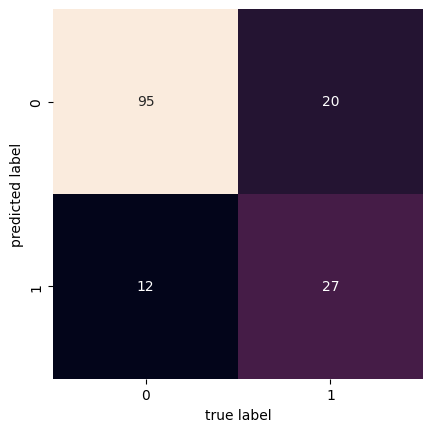

In [11]:
# Accuracy and Confusion Matrix for test data
accuracy = metrics.accuracy_score(y_test, model0.predict(X_test))
print("Accuracy: %.3f" % accuracy)

precision = metrics.precision_score(y_test, model0.predict(X_test))
print("Precision: %.3f" % precision)

recall = metrics.recall_score(y_test, model0.predict(X_test))
print("Recall: %.3f" % recall)

f1 = metrics.f1_score(y_test, model0.predict(X_test))
print("F1 Score: %.3f" % f1)

cm = metrics.confusion_matrix(y_test, model0.predict(X_test))
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

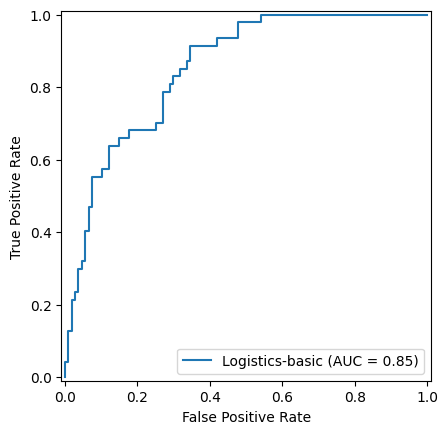

In [12]:
# Plot ROC/AUC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,model0.predict_proba(X_test)[:,1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                 estimator_name='Logistics-basic')
display.plot()

plt.show()

**Hyper-parameter tuning**:

Steps to tune the parameters:
1. Prioritize those parameters which have the most effect on our model. (Example: n-neighbors bor KNN, n-estimators for random forest etc.)
2. Set various values to these parameters and store them in a **dictionary** as shown below.
3. Create an object of the GridSearchCV class or the RandomizedSearchCV and assign the parameters to it.
4. Fit the training set in the object.
5. We will get the best parameters from the best_estimator_ property of the object.


In [13]:
# Hyperparemter tuning with RandomizedSearchCV
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

# Hyperparemter tuning with GridSearchCV
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#

# Define the hyperparameter grid ---feel free to customize these
param_grid_lg = {'solver': ['saga', 'liblinear'],
                  'penalty': ['l1','l2'],
                 'C': [0.001,0.01,0.1,1,10,100,1000],
                  'max_iter' : [10,100,500]}

# Initialize GridSearchCV
lg_grid = RandomizedSearchCV(estimator=LogisticRegression(),  # the model
                            param_distributions=param_grid_lg,  # hyperparameter space
                             scoring='roc_auc')  # default: 5 folder cross-validation

In [14]:
# Fit the model to the data
lg_grid.fit(X_train, y_train)

RandomizedSearchCV(estimator=LogisticRegression(),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'max_iter': [10, 100, 500],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['saga', 'liblinear']},
                   scoring='roc_auc')

In [15]:
# Get the best parametetrs
print(lg_grid.best_params_)

{'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 500, 'C': 10}


Accuracy: 0.805
Precision: 0.718
Recall: 0.596
F1 Score: 0.651


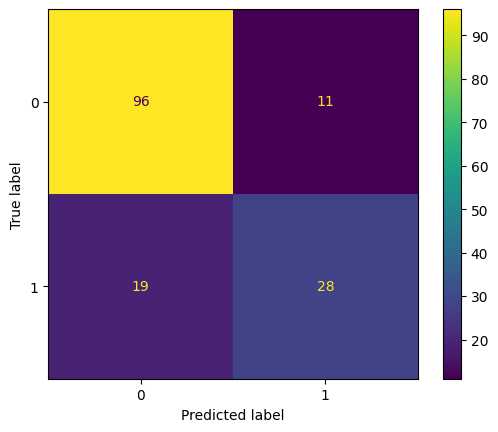

In [16]:
# Logistic Regression Model Performance for test data
lgmodel = lg_grid.best_estimator_

# Accuracy and Confusion Matrix for test data
accuracy = metrics.accuracy_score(y_test, lgmodel.predict(X_test))
print("Accuracy: %.3f" % accuracy)

precision = metrics.precision_score(y_test, lgmodel.predict(X_test))
print("Precision: %.3f" % precision)

recall = metrics.recall_score(y_test, lgmodel.predict(X_test))
print("Recall: %.3f" % recall)

f1 = metrics.f1_score(y_test, lgmodel.predict(X_test))
print("F1 Score: %.3f" % f1)

cm = metrics.confusion_matrix(y_test, lgmodel.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

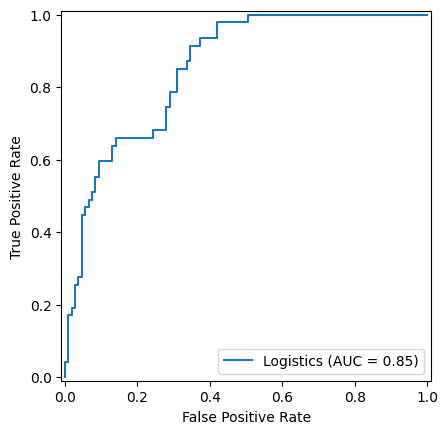

In [17]:
# Plot ROC/AUC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,lgmodel.predict_proba(X_test)[:,1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                 estimator_name='Logistics')
display.plot()

plt.show()

## Random Forest Classifier

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [18]:
# Hyperparemter tuning with GridSearchCV
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#

# Define the hyperparameter grid ---feel free to customize these
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

'''
You may try more values/ranges---it takes much longer to execute
param_grid_rf = {
    'n_estimators': [50, 80, 90, 100, 125, 150],
    'criterion': ['gini', 'entropy'],
    'max_depth': range(2,20,1),
    'min_samples_leaf': range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features': ['auto','sqrt', 'log2']
}'''

"\nYou may try more values/ranges---it takes much longer to execute\nparam_grid_rf = {\n    'n_estimators': [50, 80, 90, 100, 125, 150],\n    'criterion': ['gini', 'entropy'],\n    'max_depth': range(2,20,1),\n    'min_samples_leaf': range(1,10,1),\n    'min_samples_split': range(2,10,1),\n    'max_features': ['auto','sqrt', 'log2']\n}"

In [19]:
# Initialize GridSearchCV
rf_grid = GridSearchCV(estimator = RandomForestClassifier(), param_grid = param_grid_rf, cv =5, n_jobs = -1)

In [20]:
# Fit the model to the data
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]})

In [21]:
# Get the best parametetrs and the best estimator
print(rf_grid.best_params_)
best_rf = rf_grid.best_estimator_

{'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 50}


Accuracy: 0.812
Precision: 0.696
Recall: 0.681
F1 Score: 0.688


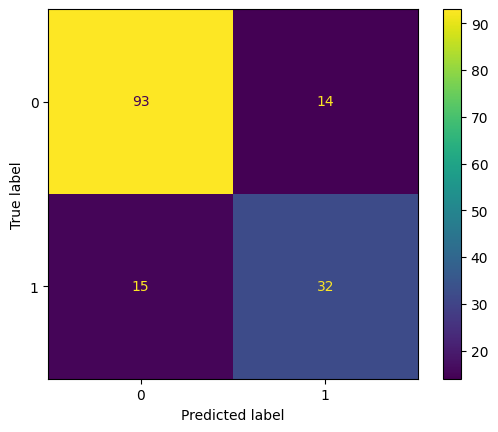

In [22]:
# Random Forest Model Performance for test data
# best_rf = rf_grid.best_estimator_

# Accuracy and Confusion Matrix for test data
accuracy = metrics.accuracy_score(y_test, best_rf.predict(X_test))
print("Accuracy: %.3f" % accuracy)

precision = metrics.precision_score(y_test, best_rf.predict(X_test))
print("Precision: %.3f" % precision)

recall = metrics.recall_score(y_test, best_rf.predict(X_test))
print("Recall: %.3f" % recall)

f1 = metrics.f1_score(y_test, best_rf.predict(X_test))
print("F1 Score: %.3f" % f1)

cm = metrics.confusion_matrix(y_test, best_rf.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

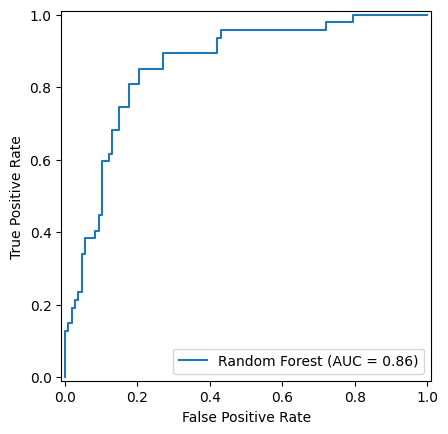

In [23]:
# Plot ROC/AUC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,best_rf.predict_proba(X_test)[:,1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                 estimator_name='Random Forest')
display.plot()

plt.show()

<font color='red'> Replacing XXX in following codes. (Similar to the steps in using GridSearchCV above for random forest classifier)

In [24]:
# Hyperparemter tuning with RandomizedSearchCV
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

# Define the hyperparameter grid--feel free to customize these
param_grid_rf2 = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize RandomizedSearchCV
rf_grid2 = RandomizedSearchCV(estimator=RandomForestClassifier(),  # the model
                            param_distributions=param_grid_rf2,  # hyperparameter space
                             scoring='roc_auc')  # default: 5 folder cross-validation

In [25]:
# Fit the model to the data
rf_grid2.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='roc_auc')

In [26]:
# Get the best parametetrs and the best estimator
print(rf_grid2.best_params_)
print(rf_grid2.best_estimator_)

{'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}
RandomForestClassifier(max_depth=30, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=400)


Accuracy: 0.818
Precision: 0.732
Recall: 0.638
F1 Score: 0.682


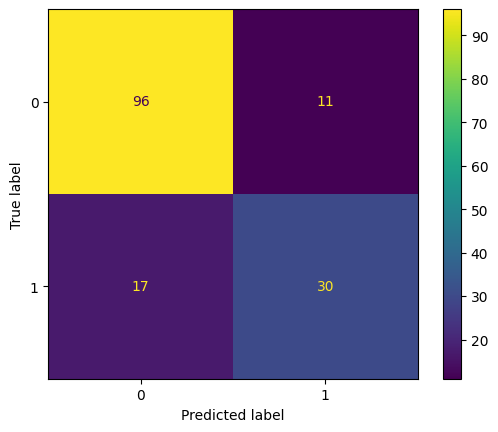

In [27]:
# Accuracy and Confusion Matrix for test data
rfmodel = rf_grid2.best_estimator_
accuracy = metrics.accuracy_score(y_test, rfmodel.predict(X_test))
print("Accuracy: %.3f" % accuracy)
precision = metrics.precision_score(y_test, rfmodel.predict(X_test))
print("Precision: %.3f" % precision)
recall = metrics.recall_score(y_test, rfmodel.predict(X_test))
print("Recall: %.3f" % recall)
f1 = metrics.f1_score(y_test, rfmodel.predict(X_test))
print("F1 Score: %.3f" % f1)
cm = metrics.confusion_matrix(y_test, rfmodel.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

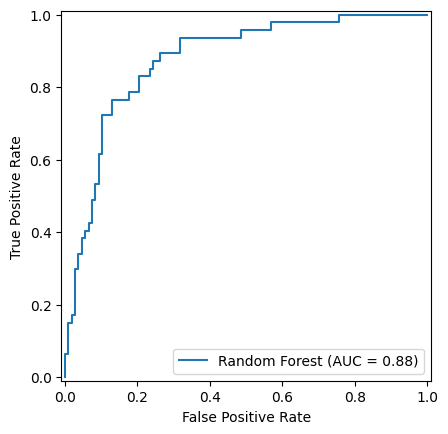

In [28]:
# Plot ROC/AUC curve
fpr, tpr, thresh = metrics.roc_curve(y_test, rfmodel.predict_proba(X_test)[:, 1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                 estimator_name='Random Forest')
display.plot()
plt.show()

**Optional: you may also try different models using dictionaries**

In [29]:
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
}

# Define hyperparameters grid for each classifier
param_grids = {
    'Logistic Regression': {
        'solver': ['saga', 'liblinear'],
        'penalty': ['l1','l2'],
        'C': [0.001,0.01,0.1,1,10,100,1000],
    },
    'Random Forest': {
      'n_estimators': [50, 100, 150],
      'max_depth': [None, 10, 20],
      'min_samples_split': [2, 5, 10],
      'max_features': ['sqrt', 'log2']
    },
     'SVM': {
        'C': [0.1, 1, 10, 100, 1000],
        'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 'scale', 'auto'],
        'kernel': ['rbf','linear']
    },
    'KNN': {
        'n_neighbors': [3,4,5,6,7,8,9,10],
        'weights': ['uniform', 'distance']
    }
}

In [30]:
# Model training and best estimators
results = {}
for name, classifier in classifiers.items():
    print("Training: ", name)
    gridSearch = RandomizedSearchCV(estimator=classifier,
                                    param_distributions=param_grids[name],
                                    cv=5)
    gridSearch.fit(X_train, y_train)
    results[name] = gridSearch.best_estimator_

print(results)

Training:  Logistic Regression
Training:  Random Forest
Training:  SVM
Training:  KNN
{'Logistic Regression': LogisticRegression(C=1000, solver='liblinear'), 'Random Forest': RandomForestClassifier(max_depth=20, max_features='log2', min_samples_split=5,
                       n_estimators=150), 'SVM': SVC(C=100, gamma=0.0001, kernel='linear'), 'KNN': KNeighborsClassifier(n_neighbors=7)}



Model Performance for Logistic Regression
Accuracy: 0.805
Precision: 0.718
Recall: 0.596
F1 Score: 0.651


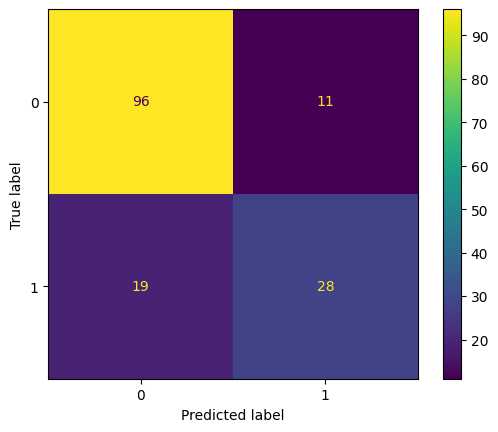

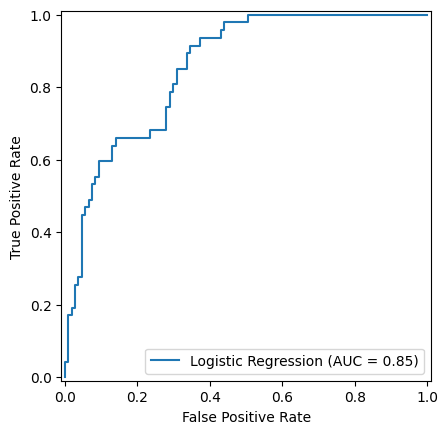


Model Performance for Random Forest
Accuracy: 0.792
Precision: 0.667
Recall: 0.638
F1 Score: 0.652


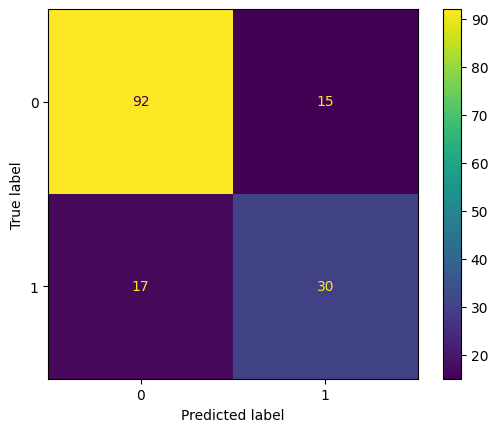

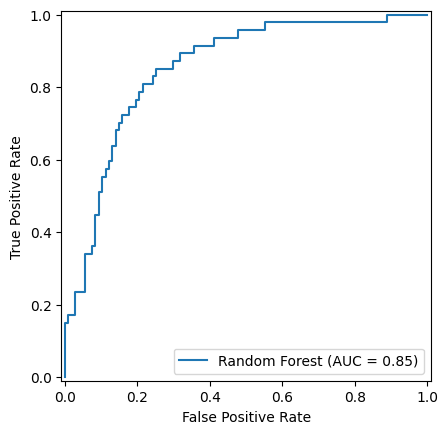


Model Performance for SVM
Accuracy: 0.799
Precision: 0.682
Recall: 0.638
F1 Score: 0.659


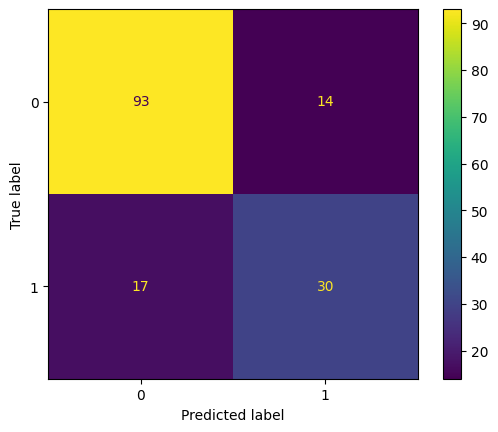


Model Performance for KNN
Accuracy: 0.740
Precision: 0.571
Recall: 0.596
F1 Score: 0.583


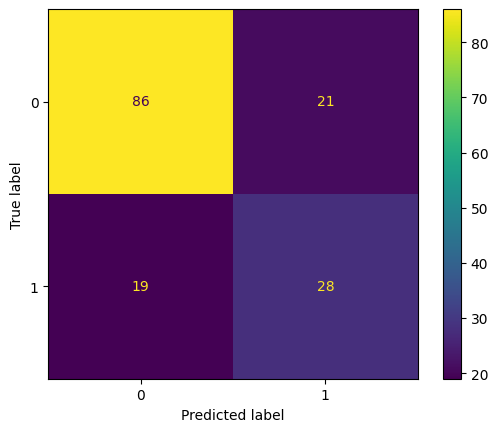

In [31]:
# Model performance
for name, clf in results.items():
    print("\nModel Performance for", name)
    y_pred = clf.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print("Accuracy: %.3f" % accuracy)

    precision = metrics.precision_score(y_test, y_pred)
    print("Precision: %.3f" % precision)

    recall = metrics.recall_score(y_test, y_pred)
    print("Recall: %.3f" % recall)

    f1 = metrics.f1_score(y_test, y_pred)
    print("F1 Score: %.3f" % f1)

    cm = metrics.confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

    # Plot ROC curve for the models that can calculate probabilites
    if name == 'Logistic Regression' or name == 'Random Forest':
       # Plot ROC/AUC curve
       fpr, tpr, thresholds = metrics.roc_curve(y_test,clf.predict_proba(X_test)[:,1])
       roc_auc = metrics.auc(fpr, tpr)
       display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name=name)
       display.plot()

       plt.show()

## Neural Networks Classifier (Pytorch)

**PyTorch models can be used in scikit-learn if wrapped with skorch.**

In [32]:
# pip install skorch

In [33]:
import torch
import torch.nn as nn
import torch.optim as optim

from skorch import NeuralNetClassifier

In [34]:
# Convert pandas Dataframe to torch tensor
Xtrain= torch.tensor(X_train.values.astype(np.float32))  # convert to torch tensor
ytrain = torch.tensor(y_train.values.astype(np.float32)).reshape(-1, 1) # convert to torch tensor

Xtest= torch.tensor(X_test.values.astype(np.float32))  # convert to torch tensor
ytest = torch.tensor(y_test.values.astype(np.float32)).reshape(-1, 1) # convert to torch tensor

print(ytrain.shape)

torch.Size([614, 1])


Recall the **Inheritance** princile of OOP, which is a way to create subclass (child class) from superclass (parent class).
* This is the case with PyTorch! Within the **nn package**, there is a class called **Module**, and it is the base class for all of neural network modules which includes layers.
* This means that all of the layers in PyTorch extend the `nn.Module` class and inherit all of PyTorch's built-in functionality within the `nn.Module` class.
As shown in the following, you can define your model class based on the superclass --nn.Module

In [35]:
# PyTorch classifier
class MyClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Linear(8, 12)
        self.act = nn.ReLU()
        self.output = nn.Linear(12, 1)
        self.prob = nn.Sigmoid()

    def forward(self, x):
        x = self.act(self.layer(x))
        x = self.prob(self.output(x))
        return x

In [36]:
# Create model with skorch
NNmodel = NeuralNetClassifier(
    MyClassifier,
    criterion=nn.BCELoss,
    optimizer=optim.Adam,
    verbose=False)

In [37]:
## If GPU is available, you may try the following --optional for this simple data
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device", device)
#NNmodel.to(device)

Device cpu


In [38]:
# define the grid search parameters
param_grid_nn = {
    'batch_size': [10, 20],
    'max_epochs': [50, 100, 200, 300]}

# You may try more values/ranges---it takes much longer to execute
'''
param_grid_nn = {
    'batch_size': [10, 20],
    'max_epochs': [50, 100, 200, 300, 500],
    'optimizer__lr': [0.001, 0.01, 0.1, 0.2, 0.3],
}'''
grid_nn = GridSearchCV(estimator=NNmodel, param_grid=param_grid_nn, n_jobs=-1, cv=3)
grid_nn.fit(Xtrain, ytrain)

GridSearchCV(cv=3,
             estimator=<class 'skorch.classifier.NeuralNetClassifier'>[uninitialized](
  module=<class '__main__.MyClassifier'>,
),
             n_jobs=-1,
             param_grid={'batch_size': [10, 20],
                         'max_epochs': [50, 100, 200, 300]})

In [39]:
# Get the best parametetrs
print(grid_nn.best_params_)


{'batch_size': 10, 'max_epochs': 100}


Accuracy: 0.591
Precision: 0.411
Recall: 0.787
F1 Score: 0.540


Text(113.9222222222222, 0.5, 'predicted label')

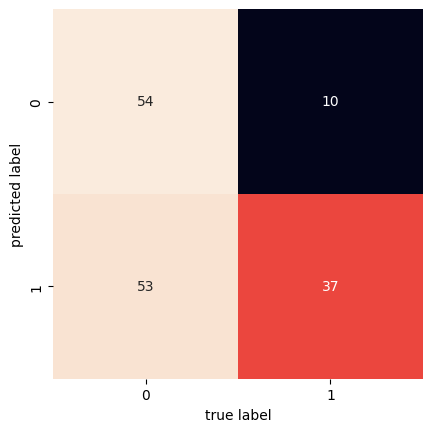

In [40]:
# Neural Networks Model Performance for test data
best_nn = grid_nn.best_estimator_

# Accuracy and Confusion Matrix for test data
accuracy = metrics.accuracy_score(ytest, best_nn.predict(Xtest))
print("Accuracy: %.3f" % accuracy)

precision = metrics.precision_score(ytest, best_nn.predict(Xtest))
print("Precision: %.3f" % precision)

recall = metrics.recall_score(ytest, best_nn.predict(Xtest))
print("Recall: %.3f" % recall)

f1 = metrics.f1_score(ytest, best_nn.predict(Xtest))
print("F1 Score: %.3f" % f1)

cm = metrics.confusion_matrix(ytest, best_nn.predict(Xtest))
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

<font color='red'> Replacing XXX in following codes.

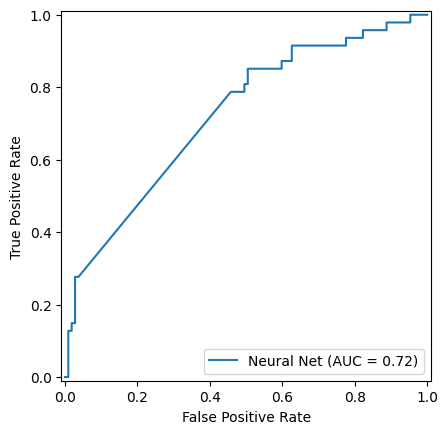

In [41]:
# Plot ROC/AUC curve for neural networks classifier
fpr, tpr, thresh = metrics.roc_curve(ytest, best_nn.predict_proba(Xtest)[:,1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="Neural Net")
display.plot()
plt.show()

# Multi-class Classification

In [42]:
from sklearn import datasets

iris = datasets.load_iris()

In [43]:
# Features (sepal length, sepal width, petal length, petal width)
X = iris.data

# Target variable (species: 0 = setosa, 1 = versicolor, 2 = virginica)
y = iris.target

# Feature names
feature_names = iris.feature_names

# Target names
target_names = iris.target_names

print(X.shape)  # (150, 4) - 150 samples, 4 features
print(y.shape)  # (150,) - 150 target values
print("feature names", feature_names)
print("target names:", target_names)

(150, 4)
(150,)
feature names ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target names: ['setosa' 'versicolor' 'virginica']


In [44]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [45]:
# Fit the classifier
classifier = RandomForestClassifier().fit(X_train, y_train)

In [46]:
# Predict the labels of the test set samples
predicted_labels = classifier.predict(X_test)

# Build the confusion matrix of our 3-class classification problem
cnf_matrix = metrics.confusion_matrix(y_test, predicted_labels)
print(cnf_matrix)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


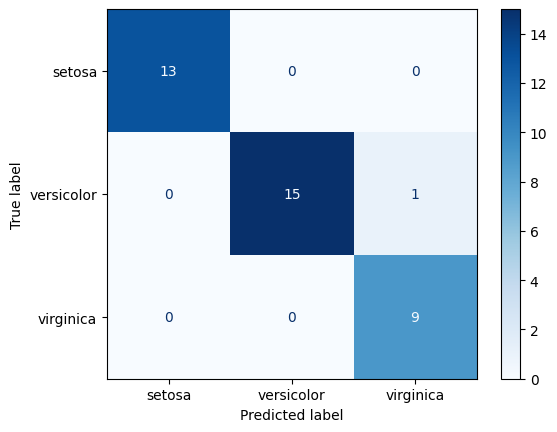

In [47]:
# Create the ConfusionMatrixDisplay object, ensuring 'cnf_matrix' is used
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=target_names)

# Plot the confusion matrix
disp.plot(cmap='Blues')
plt.show()

* On the x-axis we have the predicted labels and on the y-axis we have the true labels of out test set's samples (remember that the prediction was done using only the test set).
* Ideally, **a perfect classifier would result in a confusion matrix where we have values only on the diagonal** i.e. in a case where we classify correctly all the test samples for all the 3 classes/groups that we have.
* The values in the boxes are just counts. For instance, in our case, the upper left box has a value 13 inside and the next 2 boxes have 0 and 0. This means that we are able to correctly classify all 13 setosa test samples.

In [48]:
# https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.classification_report.html
print(metrics.classification_report(y_test, predicted_labels, target_names=target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [49]:
# Can you understand the following calculation?

FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) # using columns in confusion matrix
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix) # using rows in confusion matrix
TP = np.diag(cnf_matrix)                          # on the diagonal
TN = cnf_matrix.sum() - (FP + FN + TP)
print(FP, FN, TP, TN)

[0 0 1] [0 1 0] [13 15  9] [25 22 28]


<font color='red'> Based on Confusion Matrix above, please manually calculate precision, recall, F-measure and accuracy.

In [50]:
# precision
precision = TP/(TP+FP)
precision

array([1. , 1. , 0.9])

In [51]:
# recall
recall = TP/(TP+FN)
recall

array([1.    , 0.9375, 1.    ])

In [52]:
# f1-score
F1_score = (2*precision*recall) / (precision + recall)
F1_score

array([1.        , 0.96774194, 0.94736842])

In [53]:
# Overall accuracy for each class
ACC = (TP+TN)/(TP+TN+FP+FN)
ACC

array([1.        , 0.97368421, 0.97368421])

In [54]:
# More for your reference
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP)
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

### Hype-parameter tuning

In [65]:
# Define the hyperparameter grid ---feel free to customize these
param_grid_rf2 = {
    'n_estimators': [50, 80, 90, 100, 125, 150],
    'criterion': ['gini', 'entropy'],
    'max_depth': range(2,20,1),
    'min_samples_leaf': range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features': ['auto','sqrt', 'log2']
}

In [ ]:
# Initialize GridSearchCV
rf_grid2 = GridSearchCV(estimator = RandomForestClassifier(), param_grid = param_grid_rf2, cv =5, n_jobs = -1)

# Fit the model to the data
rf_grid2.fit(X_train, y_train)

# Get the best parametetrs and the best estimator
print(rf_grid2.best_params_)
best_rf2 = rf_grid2.best_estimator_

In [ ]:
cnf_matrix2 = metrics.confusion_matrix(y_test, best_rf2.predict(X_test))
print(cnf_matrix2)